In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import plotly.express as px

In [2]:
data = pd.read_csv(r"C:\Users\Zachary.Cone.SERN\Desktop\SSE 591-Intro to Python & Data Science\Week 4\SSE591_Week4\Tsunami Events Dataset.csv")
Japan = data.query("Country == 'JAPAN'")
Tsunamis = Japan.iloc[:, list(range(1,4))+[9]+[15]+[16]]
Tsunamis = Tsunamis.dropna().reset_index(drop=True)
Tsunamis["Time"] = pd.to_datetime({
    "year": Tsunamis["Year"],
    "month": Tsunamis["Mo"],
    "day": Tsunamis["Dy"]
})
Tsunamis = Tsunamis.drop(["Year", "Mo", "Dy"], axis=1)
Tsunamis = Tsunamis[['Time','EarthquakeNanMagnitude','Latitude','Longitude']]
Tsunamis = Tsunamis.rename(columns={'EarthquakeNanMagnitude': "Mag", 'Latitude': "Lat", 'Longitude': "Lon"})
Tsunamis

,Time,Mag,Lat,Lon
0,1901-06-15,6.0,39.000,143.000
1,1901-06-24,7.5,28.000,130.300
2,1901-08-09,7.2,40.500,142.500
3,1901-08-09,7.4,40.600,142.300
4,1901-08-09,6.3,40.500,142.500
...,...,...,...,...
161,2018-05-06,5.4,31.444,140.193
162,2019-06-18,6.4,38.646,139.472
163,2021-02-13,7.1,37.745,141.749
164,2022-03-16,7.3,37.702,141.587


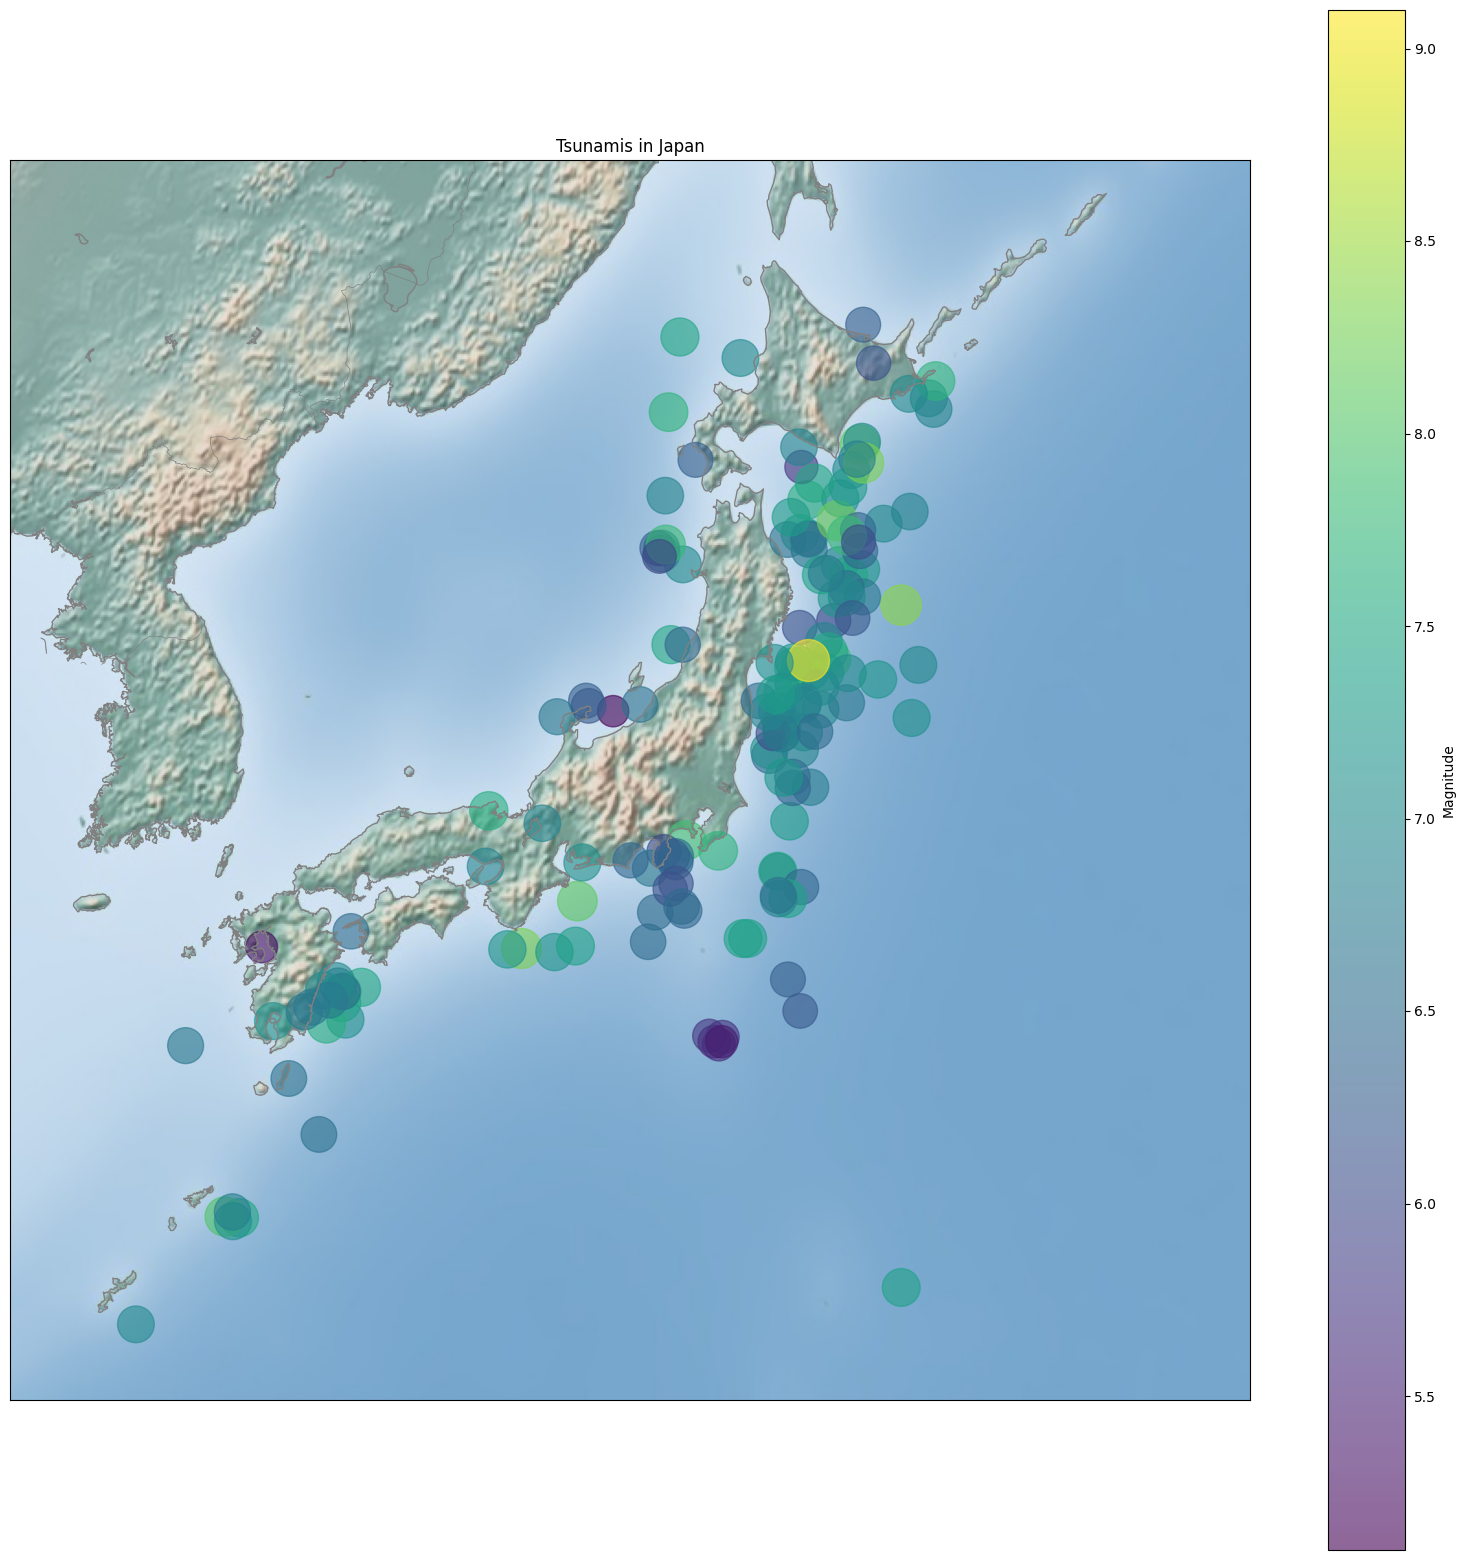

In [6]:
# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution='i', 
            lat_0=36.20, lon_0=138.25,
            width=2.5E6, height=2.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Assuming you have the data loaded in arrays
lat = Tsunamis["Lat"]
lon = Tsunamis["Lon"]
mag = Tsunamis["Mag"]

# 2. scatter city data, with color reflecting magnitude
# and size reflecting magnitude
m.scatter(lon, lat, latlon=True,
          c=mag, s=mag*100,
          cmap='viridis', alpha=0.6)

# 3. create colorbar
plt.colorbar(label='Magnitude')

# Set title
plt.title('Tsunamis in Japan')

plt.show()

In [4]:
fig = px.scatter_mapbox(
    data_frame = Tsunamis,
    lat="Lat",
    lon="Lon",
   
    hover_data=["Time", "Mag"],
   
    color="Mag",
    size="Mag",
    size_max=50,
    opacity=0.4,
    
    zoom=5,
    height=1500,
    width=1500)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[Timestamp('1901-06-15 00:00:00'), 6.0],
                                   [Timestamp('1901-06-24 00:00:00'), 7.5],
                                   [Timestamp('1901-08-09 00:00:00'), 7.2],
                                   ...,
                                   [Timestamp('2021-02-13 00:00:00'), 7.1],
                                   [Timestamp('2022-03-16 00:00:00'), 7.3],
                                   [Timestamp('2023-05-05 00:00:00'), 6.2]], dtype=object),
              'hovertemplate': ('Mag=%{marker.color}<br>Lat=%{l' ... '{customdata[0]}<extra></extra>'),
              'lat': array([39.   , 28.   , 40.5  , 40.6  , 40.5  , 37.4  , 34.5  , 34.5  , 35.4  ,
                            28.   , 40.5  , 31.58 , 38.3  , 35.4  , 35.1  , 34.9  , 35.6  , 37.9  ,
                            34.2  , 40.   , 31.7  , 41.2  , 32.2  , 39.209, 38.1  , 36.6  , 39.9  ,
                            40.7  , 38.2  , 36.7  , 43.6  , 25.321, 37.1  , 37.2  , 37.5  , 37.   ,
                            37.6  , 37.   , 37.4  , 36.7  , 37.   , 32.3  , 40.1  , 44.2  , 32.   ,
                            41.2  , 34.   , 34.7  , 40.9  , 33.123, 43.8  , 33.1  , 42.15 , 41.7  ,
                            34.   , 38.9  , 44.3  , 33.8  , 37.5  , 37.5  , 39.8  , 39.4  , 40.3  ,
                            36.   , 36.   , 36.2  , 31.6  , 29.6  , 42.9  , 42.7  , 38.073, 42.2  ,
                            41.8  , 40.3  , 40.4  , 38.65 , 40.4  , 34.9  , 32.3  , 40.8  , 41.5  ,
                            39.4  , 33.3  , 32.2  , 32.2  , 41.4  , 33.3  , 32.9  , 33.3  , 43.2  ,
                            34.6  , 34.809, 38.19 , 40.232, 34.808, 38.64 , 42.158, 36.194, 33.826,
                            40.462, 40.249, 41.346, 31.448, 32.386, 34.006, 36.988, 32.034, 37.447,
                            39.571, 39.837, 34.706, 33.267, 39.419, 32.536, 37.634, 42.851, 41.985,
                            40.608, 40.525, 34.59 , 27.929, 28.094, 31.555, 30.568, 31.885, 31.789,
                            31.959, 39.027, 34.221, 34.319, 33.901, 23.346, 41.815, 37.812, 33.07 ,
                            33.184, 43.006, 34.064, 38.276, 38.107, 31.394, 37.336, 37.57 , 37.552,
                            41.892, 34.743, 25.93 , 26.901, 38.435, 38.297, 38.276, 38.034, 40.887,
                            37.89 , 37.156, 37.005, 39.856, 31.529, 31.001, 40.394, 37.393, 31.444,
                            38.646, 37.745, 37.702, 37.54 ]),
              'legendgroup': '',
              'lon': array([143.   , 130.3  , 142.5  , 142.3  , 142.5  , 142.6  , 141.5  , 141.5  ,
                            136.3  , 130.   , 142.   , 130.67 , 142.9  , 141.8  , 139.5  , 140.2  ,
                            135.1  , 142.   , 142.   , 143.2  , 132.2  , 142.5  , 132.1  , 144.59 ,
                            142.4  , 141.4  , 143.7  , 144.3  , 142.2  , 141.4  , 144.3  , 125.115,
                            141.7  , 141.7  , 141.8  , 141.7  , 141.2  , 141.5  , 141.6  , 142.1  ,
                            142.2  , 132.   , 139.5  , 139.5  , 132.1  , 143.3  , 137.1  , 137.2  ,
                            142.1  , 135.905, 141.   , 135.6  , 143.85 , 143.6  , 141.7  , 142.2  ,
                            144.1  , 138.8  , 142.2  , 143.2  , 143.4  , 143.7  , 142.5  , 142.3  ,
                            141.9  , 141.9  , 131.8  , 131.8  , 145.6  , 145.7  , 142.741, 143.9  ,
                            142.4  , 139.   , 139.   , 139.2  , 138.9  , 139.   , 132.5  , 143.2  ,
                            142.7  , 143.1  , 132.2  , 132.1  , 131.7  , 143.5  , 140.8  , 130.3  ,
                            140.7  , 145.8  , 138.7  , 139.259, 142.03 , 143.703, 139.181, 142.75 ,
                            142.361, 141.702, 139.434, 139.102, 138.948, 139.099, 140.036, 131.945,
                            141.5  , 141.689, 131.837, 137.865, 143.333, 142.76 , 139.252, 138.643,
                            143.33 , 141.641, 137.245, 139.197, 139.839, 143.683